In [5]:
from scipy.stats import norm, expon
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = "https://raw.githubusercontent.com/jealcalat/AEM-ITESO/main/datasets/booking_days.csv"

data = pd.read_csv(url)['days']

all_days = data.values

0     7.958745
1    12.559308
2     9.232231
3     7.872012
4     5.510485
Name: days, dtype: float64

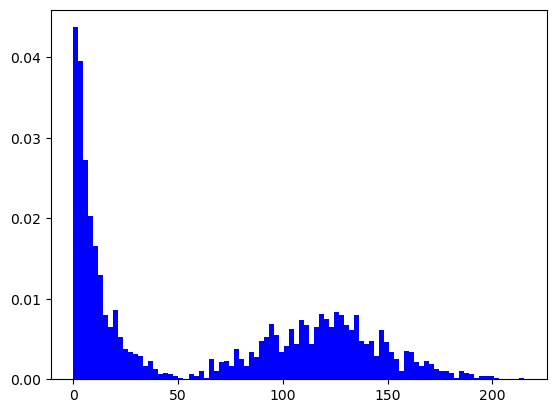

In [7]:
plt.hist(all_days, bins=90, density=True, color='blue');

In [9]:
 # definir la función de verosimilitud (log-verosim negativa)
    
def neg_log_mix(theta, all_days):
    rate, mean, std, w = theta
    l_exec = expon.pdf(all_days, scale=1/rate)
    l_vaca = norm.pdf(all_days, mean, std)
    mix = w * l_exec + (1-w) * l_vaca
    log_mix = np.log(mix + 1e-90)
    return -np.sum(log_mix)

res = minimize(
        neg_log_mix,
        [0.1, 90, 10, 0.45],
        bounds=[(0.0001, None),(5, 400), (1, 40), (0, 1)],
        args=(all_days)
)

res.x

array([1.00750911e-01, 1.20729990e+02, 2.91308475e+01, 4.98810888e-01])